## Introduction

This notebook is my record of how to perform queries on BigQuery public dataset (using the Hacker News dataset as an example).

## Getting set up

I've activated my virtual environment and set the environment variable to authenticate against Google Cloud. Before I start, I check if things are set up correctly:

In [5]:
#check if which virtual env i am in, and if env variable for google cloud is saved
import sys
import os
print(f"We are in the virtual env named: {sys.prefix}")
print(f"GOOGLE_APPLICATION_CREDENTIALS = {os.environ['GOOGLE_APPLICATION_CREDENTIALS']}")

We are in the virtual env named: C:\Users\fangn\anaconda3\envs\hackernews
GOOGLE_APPLICATION_CREDENTIALS = C:\Users\fangn\OneDrive\Documents\Data Science Portfolio\hackernews-agtech-2d07274b705e.json


Now I can import the packages I will need:

In [1]:
import pandas as pd
from google.cloud import bigquery

## Testing out different ways of saving query results to a dataframe 

From what I've found, there are different ways of saving the results of a query into a dataframe to work with.     
Firstly, I tried out this code from a [Kaggle notebook on SQL and BigQuery](https://www.kaggle.com/mrisdal/mentions-of-kaggle-on-hacker-news):

In [2]:
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r"(a|A)gtech")
ORDER BY time
"""

query_job = client.query(query)

iterator = query_job.result(timeout=30)
rows = list(iterator)

# Transform the rows into a nice pandas dataframe
headlines = pd.DataFrame(data=[list(x.values()) for x in rows], columns=list(rows[0].keys()))

# Look at the first 100 headlines
headlines.head(100)

,title,type,timestamp,url
0,42 New Food Tech and Agtech Funding Opportunit...,story,2015-06-08 20:39:10+00:00,http://www.foodtechconnect.com/2015/06/04/42-n...
1,Agtech Funding Dips to $3.2bn While Deal Activ...,story,2017-02-02 22:46:07+00:00,https://agfundernews.com/a-year-of-contrasts-a...
2,Agricultural giants risk being left behind in ...,story,2017-05-23 18:59:50+00:00,https://agfundernews.com/agricultural-giants-r...
3,This is the highest funded Agtech Startup: Plenty,story,2017-11-10 07:49:03+00:00,https://www.vox.com/energy-and-environment/201...
4,Beginner's Guide to Agtech: Innovating in the ...,story,2018-10-01 07:52:03+00:00,https://softmedialab.com/blog/agtech-innovatin...
5,Agtech: Innovating in the Farming Industry,story,2018-10-05 11:12:13+00:00,https://softmedialab.com/blog/agtech-innovatin...
6,10 European agtech startups preparing us for t...,story,2018-11-13 11:23:27+00:00,https://www.eu-startups.com/2018/11/10-europea...
7,Agtech startup Farmee to support farmers remotely,story,2019-01-14 21:23:16+00:00,https://urbanagnews.com/blog/news/ag-tech-star...
8,What Is the Future of Food? Interview with Dav...,story,2019-04-02 01:09:11+00:00,https://www.listennotes.com/podcasts/future-fo...
9,Overview: Techstars Farm to Fork Demo Day Agtech,story,2019-10-16 19:14:21+00:00,https://startingupnorth.com/thepath/techstars-...


I also saw another slightly simpler code to save the query to a pandas df, which doesn't use the iterator. (NB: I'm not super sure of the logic behind the above code.)  
This code also produces the same output:

In [3]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r"(a|A)gtech") OR REGEXP_CONTAINS(title, r"(a|A)gritech") OR REGEXP_CONTAINS(title, r"(a|A)g (t|T)ech") OR REGEXP_CONTAINS(title, r"(a|A)g-tech") OR REGEXP_CONTAINS(title, r"(a|A)gri-tech")
ORDER BY timestamp
"""

agtech_titles_df = client.query(query).to_dataframe()
agtech_titles_df

,title,type,timestamp,url
0,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...
1,Hacker News for Agriculture and Ag Tech,story,2013-08-20 11:34:07+00:00,http://news.agfunder.com/
2,42 New Food Tech and Agtech Funding Opportunit...,story,2015-06-08 20:39:10+00:00,http://www.foodtechconnect.com/2015/06/04/42-n...
3,Precision Ag Tech Helps California Farmers Gro...,story,2015-07-05 09:54:43+00:00,http://techcrunch.com/2015/07/04/precision-ag-...
4,Ag tech funding – personal aquaponics,story,2015-11-04 17:29:24+00:00,http://www.bothsidesofthetable.com/2015/11/03/...
5,Amazone radar sensor system wins Agritechnica ...,story,2015-11-29 06:04:26+00:00,http://www.weeklytimesnow.com.au/machine/amazo...
6,Sprout - An Australian Ag Tech Incubator,story,2015-12-12 04:43:57+00:00,http://nffdigital.org.au
7,Job in Ag Tech: Embedded Systems Engineer for ...,story,2016-01-05 16:09:24+00:00,https://urbanverticalproject.wordpress.com/201...
8,Big Chemical and Agribusiness Corporates: Inve...,story,2016-03-28 16:31:51+00:00,https://www.cbinsights.com/blog/chemical-agrib...
9,"Deere, Pioneer back new Iowa home for ag-tech ...",story,2016-08-31 16:18:35+00:00,http://www.desmoinesregister.com/story/tech/20...


Now that I've learned how to pull the data from BigQuery, it's time to dig deeper into the dataset, for instance by expanding my search for stories related to ag(ri)tech.

## Finding mentions of agtech startups in Hacker News

I've created a csv file of ~100 startups in the agtech, agriculture, and farming industries listed on Crunchbase (data obtained on 11 Feb 2021). 

In [5]:
startup_names = pd.read_csv('agtech-startups-crunchbase.csv')
startup_names.head(5)

,startup_name
0,AppHarvest
1,Bear Flag Robotics
2,CropIn
3,Indigo
4,Aerobotics


To avoid typing out these ~100 names again for my SQL query, I'll create a function that generates a string containing the strings in the 'name' column separated by a '|'. Then I can just copy and paste the string for my SQL query below.

In [8]:
out = '|'.join(startup_names["startup_name"])
print(out)

AppHarvest|Bear Flag Robotics|CropIn|Indigo|Aerobotics|Plenty|Bowery Farming|Agrify|Farmers Business Network|ICEYE|Hargol FoodTech|American Robotics|Apeel Sciences|Gardyn|Taranis|WayCool|Ynsect|Flourish Software|Arbol|TaniHub|Pivot Bio|Gotham Greens|Planet FDW|AgEagle|Nature's Fynd|Benson Hill|Tevel Aerobotics Technologies|Fasal|Granular|Brightseed|BIOMILQ|eFishery|BrightFarms|Bushel|Village Farms International|Farmer's Edge Laboratories|Agricool|ProducePay|Arable|Inari|Jai Kisan|CropX|Bijak|The Climate Corporation|Gramophone|Soulfull|Telesense|DeHaat|HerdDogg|Urban gro|Silo|Ergos|Ceres Imaging|Wefarm|Semios|OnePointOne|Full Harvest|SunCulture|Root AI|GREENLABS|BharatAgri|Plantix|Trace Genomics|Naïo Technologies|Eden Farm Indonesia|Puris|Atlas AI|Bombay Hemp Company|N.Things|FarmWise|Volta Greentech|Artemis|Gamaya|Freigh Farms|Escorts|Crofarm|Vital Farms|Aanika Biosciences|80 Acres Farms|Upward Farms|iFarm|Pure Harvest Smart Farms|Intello Labs|Ecotrace|Ascend Wellness|Sentera|UrbanKisa

In [9]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r'Wefarm|Ynsect|Botham Greens|BIOMILQ|Plantix|Optimal Labs')
ORDER BY timestamp
"""

startup_titles_df = client.query(query).to_dataframe()
startup_titles_df

,title,type,timestamp,url
0,Ynsect: Convert Organic Wastes to Proteins wit...,story,2017-01-27 00:52:25+00:00,http://www.ynsect.com/


In [16]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r'AppHarvest|Bear Flag Robotics|CropIn|Indigo|Aerobotics|Bowery Farming|Agrify|Farmers Business Network|ICEYE|Hargol FoodTech|American Robotics|Apeel Sciences|Gardyn|Taranis|WayCool|Ynsect')
ORDER BY timestamp
"""

startup_titles_df = client.query(query).to_dataframe()
startup_titles_df

,title,type,timestamp,url
0,Indigo Flight,story,2009-04-03 08:55:03+00:00,http://www.indigoflights.in
1,Tanzanite Jewelery and Accessories: Indigo Gem...,story,2009-04-07 07:40:38+00:00,http://shoeseria.com/info/tanzanite-jewelery-a...
2,Tata Indigo Vista likely to roll out by early ...,story,2009-04-16 05:25:13+00:00,http://www.autoblogs.in/2009/04/new-tata-indig...
3,Swine Flu - Can Dogs Catch It? | Dog Stories |...,story,2009-04-28 16:08:09+00:00,http://www.waycooldogs.com/swine-flu-can-dogs-...
4,Swine Flu - Can Dogs Catch It? | Dog Stories |...,story,2009-04-29 17:22:37+00:00,http://www.waycooldogs.com/swine-flu-can-dogs-...
...,...,...,...,...
70,"ICEYE Shares Nearly 18,000 Satellite Images Un...",story,2020-10-13 13:16:13+00:00,https://www.iceye.com/press/press-releases/ice...
71,"Indigo Ag, Nori announce first corporate carbo...",story,2020-10-20 22:01:38+00:00,https://agfundernews.com/carbon-harvest-indigo...
72,Arianespace – Flight Vega VV17 – Seosat-Ingeni...,story,2020-11-17 10:06:21+00:00,https://www.arianespace.com/press-release/aria...
73,IndigoCoin – Cloud mining without deposit,story,2020-11-27 10:21:48+00:00,https://indigocoin.cloud/cabinet#.X8DTFXcBqFE....


In [17]:
startup_titles_df.head(20)

,title,type,timestamp,url
0,Indigo Flight,story,2009-04-03 08:55:03+00:00,http://www.indigoflights.in
1,Tanzanite Jewelery and Accessories: Indigo Gem...,story,2009-04-07 07:40:38+00:00,http://shoeseria.com/info/tanzanite-jewelery-a...
2,Tata Indigo Vista likely to roll out by early ...,story,2009-04-16 05:25:13+00:00,http://www.autoblogs.in/2009/04/new-tata-indig...
3,Swine Flu - Can Dogs Catch It? | Dog Stories |...,story,2009-04-28 16:08:09+00:00,http://www.waycooldogs.com/swine-flu-can-dogs-...
4,Swine Flu - Can Dogs Catch It? | Dog Stories |...,story,2009-04-29 17:22:37+00:00,http://www.waycooldogs.com/swine-flu-can-dogs-...
5,Cloning of the World’s First Transgenic Dog | ...,story,2009-04-30 20:11:04+00:00,http://www.waycooldogs.com/cloning-of-the-worl...
6,"Yes, Farmer John, there is another side of Swi...",story,2009-05-02 20:12:37+00:00,http://www.waycooldogs.com/yes-farmer-john-the...
7,#2 National Dog Blog Carnival is Live | Dog St...,story,2009-05-04 20:08:41+00:00,http://www.waycooldogs.com/2-national-dog-blog...
8,Dog of the Month: The Cocker | Dog Stories | W...,story,2009-05-05 23:59:24+00:00,http://www.waycooldogs.com/dog-of-the-month-th...
9,Dog Stories | WayCoolDogs.com » A Dog’s Shoppi...,story,2009-05-12 05:00:34+00:00,http://www.waycooldogs.com/a-dogs-shopping-tri...


Looking at the dataframe generated above, it looks like my code and list are not great for querying and require some debugging.  
Main issues are:
- apostrophes in names
- names of startups are common words (i.e. they do not refer to the startup)
- not sure if 100 names is too long for the query 
- the names should be discrete (see negative eg of waycooldogs)

I'm not sure if using the list from Crunchbase will yield a sufficient dataset, so I'll first make a query with a list of Y Combinator startups in the agriculture industry since they may have a higher probability of being mentioned on Hacker News.

In [23]:
yc_agri_names = pd.read_csv('y-combinator-agriculture.csv')
yc_agri_names.head(5)

,name,total_funding_amount,founded_date
0,Bear Flag Robotics,11400000.0,2017
1,Boost Biomes,9200000.0,2016
2,Bountiful,1400000.0,2015
3,CB Therapeutics,7620000.0,2015
4,Entocycle,11000000.0,2014


In [11]:
out = '|'.join(yc_agri_names["name"])
print(out)

PickTrace|Thrive Agritech|Tule|FarmLogs|Future Fields|Enveritas|Four Growers|Bear Flag Robotics|Ovipost|Beanstalk|Modular Science|Entocycle|Bountiful|UrbanKisaan|Boost Biomes|Raptor Maps|Thrive Agric|Nebullam|Kisan Network|Iron Ox


In [12]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r'PickTrace|Thrive Agritech|Tule|FarmLogs|Future Fields|Enveritas|Four Growers|Bear Flag Robotics|Ovipost|Beanstalk|Modular Science|Entocycle|Bountiful|UrbanKisaan|Boost Biomes|Raptor Maps|Thrive Agric|Nebullam|Kisan Network|Iron Ox')
ORDER BY timestamp
"""

yc_agri_df = client.query(query).to_dataframe()
yc_agri_df

,title,type,timestamp,url
0,Beanstalk -- Hosted Subversion: Free Account*,story,2007-10-23 05:24:26+00:00,http://www.beanstalkapp.com/
1,Beanstalk Messaging Queue,story,2008-01-03 16:31:02+00:00,http://nubyonrails.com/articles/about-this-blo...
2,Beanstalk -- Version Control with a Human Face,story,2008-02-01 00:35:43+00:00,http://beanstalkapp.com/
3,Beanstalk (svn host) launches git support,story,2010-03-11 19:17:03+00:00,http://blog.beanstalkapp.com/2010/03/11/git-su...
4,SEO Articles & Past Newsletters by Beanstalk,story,2010-03-18 13:36:04+00:00,http://www.beanstalk-inc.com/articles/
...,...,...,...,...
360,AWS Elastic Beanstalk support added for awstag...,story,2020-11-23 11:47:46+00:00,https://github.com/mpostument/awstaghelper/rel...
361,Raptor Maps (YC S16) Is Hiring Software Engine...,job,2020-11-25 12:00:24+00:00,https://raptormaps.com/jobs/
362,Automating Deployments with Elastic Beanstalk,story,2020-12-21 16:03:43+00:00,https://www.youtube.com/watch?v=ssVQ7OKdXiM
363,Hacking on my finances (Part 2: Beancount on B...,story,2021-01-15 13:25:56+00:00,https://duarteocarmo.com/blog/hacking-on-my-fi...


The above results looks like many results relating to the search term 'Beanstalk' do not actually correspond the agtech startup.

In [13]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r'PickTrace|Thrive Agritech|Tule|FarmLogs|Future Fields|Enveritas|Four Growers|Bear Flag Robotics|Ovipost|Modular Science|Entocycle|Bountiful|UrbanKisaan|Boost Biomes|Raptor Maps|Thrive Agric|Nebullam|Kisan Network|Iron Ox')
ORDER BY timestamp
"""

yc_agri_df2 = client.query(query).to_dataframe()
yc_agri_df2

,title,type,timestamp,url
0,STL ALT.NET presentation by Jay Tuley on Impro...,story,2011-06-30 14:00:17+00:00,http://www.nicholascloud.com/2011/06/impromptu...
1,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...
2,Come lead our growth efforts at FarmLogs,job,2012-12-12 02:44:37+00:00,None
3,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...
4,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...
...,...,...,...,...
106,Iron Ox is hiring roboticists to help build th...,job,2020-09-16 17:01:11+00:00,https://jobs.lever.co/ironox
107,Iron Ox is hiring Sr Roboticists and SWEs to b...,job,2020-10-08 17:01:02+00:00,https://jobs.lever.co/ironox
108,Raptor Maps (YC S16) Is Hiring Sales VP and Di...,job,2020-10-25 21:00:07+00:00,https://raptormaps.com/jobs/
109,Moving Issues from Jira to Tuleap,story,2020-11-08 20:27:41+00:00,https://www.tuleap.org/moving-issues-from-jira...


In [18]:
tule = yc_agri_df2[yc_agri_df2['title'].str.contains('Tule')]
tule

,title,type,timestamp,url
0,STL ALT.NET presentation by Jay Tuley on Impro...,story,2011-06-30 14:00:17+00:00,http://www.nicholascloud.com/2011/06/impromptu...
30,Tule (YC S14) – We help farmers produce more f...,job,2015-01-10 06:51:35+00:00,https://angel.co/tule/jobs/45275-ios-engineer
31,Tule (YC S14) Is a Crop-Hydration Sensor for t...,story,2015-01-22 00:02:54+00:00,http://techcrunch.com/2015/01/21/tule-is-a-cro...
36,"Tuleap and security: past, present and future",story,2015-02-24 11:26:15+00:00,https://www.enalean.com/en/Tuleap-security-pas...
37,"Californian Tule elk, presumed extinct but rev...",story,2015-03-10 22:14:31+00:00,http://en.wikipedia.org/wiki/Tule_elk
38,A Cluster of Tuleap with Docker Swarm,story,2015-03-19 17:22:37+00:00,https://www.enalean.com/en/cluster-tuleap-dock...
46,"Tuleap 8.5 released: git, kanban, scrum, media...",story,2015-08-17 15:00:59+00:00,https://www.tuleap.org/tuleap-8-5
47,"Tuleap 8.6 is out: new Kanban in 2 clicks, Sub...",story,2015-09-15 16:23:41+00:00,https://www.tuleap.org/tuleap-8-6
48,Tule (YC S14) is hiring an EE/firmware enginee...,job,2015-09-18 03:50:50+00:00,https://angel.co/tule/jobs/73578-firmware-hard...
53,Tule Elk are back on Grizzly Island after 40 y...,story,2016-01-29 18:53:23+00:00,http://www.dailygeezer.com/2016/01/27/outdoors...


In [23]:
print(f"Number of rows with 'Tule' in the title: {len(tule)}")

Number of rows with 'Tule' in the title: 27


It looks like the search term 'Tule' is also throwing up some unwanted results. This means that I will need to refine the regex to improve the search results.

In [24]:
#goal: write a function that takes the startup name and adds (?: before and )\b after it e.g. (?:name)\b

#save a list of the names
yc_ag_list = yc_agri_names['name'].tolist()
yc_ag_list
 
#add the required strings before and after each element in a string 
regex_before = r'(?:'
regex_after = r')\b' #"\b" requires an extra \ to escape the backsslash
regex_names = [regex_before + s + regex_after for s in yc_ag_list] 
print(regex_names)

#join the elements of the list
sql_search = '|'.join(regex_names)
sql_search

['(?:Bear Flag Robotics)\\b', '(?:Boost Biomes)\\b', '(?:Bountiful)\\b', '(?:CB Therapeutics)\\b', '(?:Entocycle)\\b', '(?:Enveritas)\\b', '(?:FarmLogs)\\b', '(?:Four Growers)\\b', '(?:Future Fields)\\b', '(?:Iron Ox)\\b', '(?:Kisan Network)\\b', '(?:Modular Science)\\b', '(?:Nebullam)\\b', '(?:Ovipost)\\b', '(?:PickTrace)\\b', '(?:Raptor Maps)\\b', '(?:Shiok Meats)\\b', '(?:Shiru)\\b', '(?:Thrive Agric)\\b', '(?:Thrive Agritech)\\b', '(?:Tule)\\b', '(?:UrbanKisaan)\\b']


'(?:Bear Flag Robotics)\\b|(?:Boost Biomes)\\b|(?:Bountiful)\\b|(?:CB Therapeutics)\\b|(?:Entocycle)\\b|(?:Enveritas)\\b|(?:FarmLogs)\\b|(?:Four Growers)\\b|(?:Future Fields)\\b|(?:Iron Ox)\\b|(?:Kisan Network)\\b|(?:Modular Science)\\b|(?:Nebullam)\\b|(?:Ovipost)\\b|(?:PickTrace)\\b|(?:Raptor Maps)\\b|(?:Shiok Meats)\\b|(?:Shiru)\\b|(?:Thrive Agric)\\b|(?:Thrive Agritech)\\b|(?:Tule)\\b|(?:UrbanKisaan)\\b'

In [40]:
#this is another method using pandas to save query results to a df
client = bigquery.Client()

# Using WHERE reduces the amount of data scanned / quota used
query = """
SELECT title, type, timestamp, url
FROM `bigquery-public-data.hacker_news.full`
WHERE REGEXP_CONTAINS(title, r'(?:Bear Flag Robotics)\\b|(?:Boost Biomes)\\b|(?:Bountiful)\\b|(?:CB Therapeutics)\\b|(?:Entocycle)\\b|(?:Enveritas)\\b|(?:FarmLogs)\\b|(?:Four Growers)\\b|(?:Future Fields)\\b|(?:Iron Ox)\\b|(?:Kisan Network)\\b|(?:Modular Science)\\b|(?:Nebullam)\\b|(?:Ovipost)\\b|(?:PickTrace)\\b|(?:Raptor Maps)\\b|(?:Shiok Meats)\\b|(?:Shiru)\\b|(?:Thrive Agric)\\b|(?:Thrive Agritech)\\b|(?:Tule)\\b|(?:UrbanKisaan)\\b')
ORDER BY timestamp
"""

yc_agri_df3 = client.query(query).to_dataframe()
yc_agri_df3

,title,type,timestamp,url
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...
1,Come lead our growth efforts at FarmLogs,job,2012-12-12 02:44:37+00:00,None
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...
4,Come join FarmLogs (YC W12) in bringing the wo...,job,2013-02-08 18:13:22+00:00,None
...,...,...,...,...
84,Enveritas (YC S18 Nonprofit) Is Hiring a JavaS...,job,2020-08-31 16:40:11+00:00,https://www.enveritas.org/jobs/engineering/
85,Iron Ox is hiring roboticists to help build th...,job,2020-09-16 17:01:11+00:00,https://jobs.lever.co/ironox
86,Iron Ox is hiring Sr Roboticists and SWEs to b...,job,2020-10-08 17:01:02+00:00,https://jobs.lever.co/ironox
87,Raptor Maps (YC S16) Is Hiring Sales VP and Di...,job,2020-10-25 21:00:07+00:00,https://raptormaps.com/jobs/


It looks like quite a number of the submissions are job postings, understandably because Y Combinator startups can post job openings on HN.

In [41]:
yc_agri_df3.groupby(['type']).size()

type
job      46
story    43
dtype: int64

In [42]:
yc_ag_stories = yc_agri_df3[yc_agri_df3['type'].str.contains('story')]
yc_ag_stories.head(10)

,title,type,timestamp,url
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...
5,FarmLogs (YC W12) Is Going To Change The Way T...,story,2013-02-14 18:46:01+00:00,http://www.forbes.com/sites/amitchowdhry/2013/...
6,FarmLogs (YC W12) Reimagines Agriculture,story,2013-02-15 05:32:26+00:00,http://ycuniverse.com/farmlogs-reimagines-agri...
7,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...
8,“The Most Bountiful Food in Human History?”,story,2013-03-25 01:21:59+00:00,http://www.freakonomics.com/2013/03/21/the-mos...
9,"6 Startups: FarmLogs, COLOURlovers, Apportable...",story,2013-10-21 23:27:33+00:00,http://ycuniverse.com/six-startups-that-i-rece...
12,FarmLogs Raises $4 Million In Series A Funding,story,2014-01-15 12:29:42+00:00,http://www.forbes.com/sites/amitchowdhry/2014/...
13,FarmLogs Raises $4M Series A To Further Advanc...,story,2014-01-15 16:59:00+00:00,http://techcrunch.com/2014/01/15/farmlogs-rais...


It seems like the name 'Bountiful' also throws up stories unrelated to the actual startup so I'll check the stories to see if they're actually relevant.

In [28]:
yc_ag_stories[yc_ag_stories['title'].str.contains('Bountiful')]

,title,type,timestamp,url
8,“The Most Bountiful Food in Human History?”,story,2013-03-25 01:21:59+00:00,http://www.freakonomics.com/2013/03/21/the-mos...
70,Iceland Takes Hard Look at Tech Boom Sparked b...,story,2018-04-19 13:16:40+00:00,https://www.wsj.com/articles/iceland-takes-har...
71,Iceland Takes Hard Look at Tech Boom Sparked b...,story,2018-04-20 09:55:40+00:00,https://www.wsj.com/articles/iceland-takes-har...


Since these stories are the about the startup, I might consider removing 'Bountiful' from the search term instead or manually remove them from my df.

In [43]:
yc_ag_stories = yc_ag_stories[~yc_ag_stories.title.str.contains('Bountiful')]
yc_ag_stories

,title,type,timestamp,url
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...
5,FarmLogs (YC W12) Is Going To Change The Way T...,story,2013-02-14 18:46:01+00:00,http://www.forbes.com/sites/amitchowdhry/2013/...
6,FarmLogs (YC W12) Reimagines Agriculture,story,2013-02-15 05:32:26+00:00,http://ycuniverse.com/farmlogs-reimagines-agri...
7,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...
9,"6 Startups: FarmLogs, COLOURlovers, Apportable...",story,2013-10-21 23:27:33+00:00,http://ycuniverse.com/six-startups-that-i-rece...
12,FarmLogs Raises $4 Million In Series A Funding,story,2014-01-15 12:29:42+00:00,http://www.forbes.com/sites/amitchowdhry/2014/...
13,FarmLogs Raises $4M Series A To Further Advanc...,story,2014-01-15 16:59:00+00:00,http://techcrunch.com/2014/01/15/farmlogs-rais...
21,Farming Startup FarmLogs (YC W12) Triples Mark...,story,2014-09-05 19:43:57+00:00,http://techcrunch.com/2014/09/05/farming-start...


I also have to remove rows where "(t|T)ule (e|E)lk" are featured as they do not refer to the startup.

In [44]:
yc_ag_stories = yc_ag_stories[~yc_ag_stories.title.str.contains('(t|T)ule (e|E)lk')]
yc_ag_stories

C:\Users\fangn\anaconda3\envs\hackernews\lib\site-packages\pandas\core\strings\accessor.py:101: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


,title,type,timestamp,url
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...
5,FarmLogs (YC W12) Is Going To Change The Way T...,story,2013-02-14 18:46:01+00:00,http://www.forbes.com/sites/amitchowdhry/2013/...
6,FarmLogs (YC W12) Reimagines Agriculture,story,2013-02-15 05:32:26+00:00,http://ycuniverse.com/farmlogs-reimagines-agri...
7,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...
9,"6 Startups: FarmLogs, COLOURlovers, Apportable...",story,2013-10-21 23:27:33+00:00,http://ycuniverse.com/six-startups-that-i-rece...
12,FarmLogs Raises $4 Million In Series A Funding,story,2014-01-15 12:29:42+00:00,http://www.forbes.com/sites/amitchowdhry/2014/...
13,FarmLogs Raises $4M Series A To Further Advanc...,story,2014-01-15 16:59:00+00:00,http://techcrunch.com/2014/01/15/farmlogs-rais...
21,Farming Startup FarmLogs (YC W12) Triples Mark...,story,2014-09-05 19:43:57+00:00,http://techcrunch.com/2014/09/05/farming-start...


## Generating plots of the data obtained

Firstly, plot the trend in submissions featuring ag(ri)tech in the title over the years.

In [4]:
agtech_titles_df.dtypes

title                     object
type                      object
timestamp    datetime64[ns, UTC]
url                       object
dtype: object

In [5]:
#extract year from timestamp column and save as new column 
agtech_titles_df['year'] = pd.DatetimeIndex(agtech_titles_df['timestamp']).year
agtech_titles_df.head()

,title,type,timestamp,url,year
0,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...,2013
1,Hacker News for Agriculture and Ag Tech,story,2013-08-20 11:34:07+00:00,http://news.agfunder.com/,2013
2,42 New Food Tech and Agtech Funding Opportunit...,story,2015-06-08 20:39:10+00:00,http://www.foodtechconnect.com/2015/06/04/42-n...,2015
3,Precision Ag Tech Helps California Farmers Gro...,story,2015-07-05 09:54:43+00:00,http://techcrunch.com/2015/07/04/precision-ag-...,2015
4,Ag tech funding – personal aquaponics,story,2015-11-04 17:29:24+00:00,http://www.bothsidesofthetable.com/2015/11/03/...,2015


In [6]:
#groupby year and count number of stories
agtech_yearly_mentions = agtech_titles_df.groupby(['year']).size().reset_index(name='counts')
agtech_yearly_mentions

,year,counts
0,2013,2
1,2015,5
2,2016,3
3,2017,5
4,2018,7
5,2019,12
6,2020,11


In [7]:
agtech_yearly_mentions.dtypes

year      int64
counts    int64
dtype: object

Since there were no agtech mentions in 2014, I will have to add in the missing row.

In [8]:
#move year column to index
agtech_yearly_mentions.set_index("year")
#then reindex with a new index
new_index = pd.Index(range(2013,2021), name="year")
agtech_yearly_mentions.set_index("year").reindex(new_index)
#move the index back to the columns
agtech_yearly_mentions = agtech_yearly_mentions.set_index("year").reindex(new_index).reset_index()
agtech_yearly_mentions

,year,counts
0,2013,2.0
1,2014,NaN
2,2015,5.0
3,2016,3.0
4,2017,5.0
5,2018,7.0
6,2019,12.0
7,2020,11.0


In [9]:
import matplotlib

### Trend in agtech coverage on Hacker News stories 

<AxesSubplot:xlabel='year'>

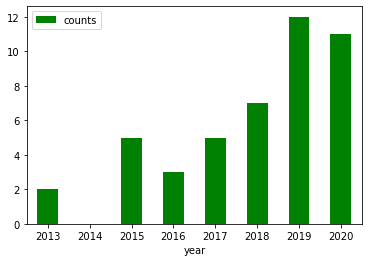

In [10]:
#plot the results in a bar graph
agtech_yearly_mentions.plot.bar(x='year', y='counts', rot=0, color="green")

### Number of stories per YC ag startup

In [48]:
# create a function that creates a new column indicating which startup is mentioned in the title column
import numpy as np

# create a list containing the conditions for mutating the new column
conditions = list(map(yc_ag_stories['title'].str.contains, regex_names))

# create new column
yc_ag_stories.loc[:,'startup']=np.select(conditions, yc_ag_list)
yc_ag_stories

C:\Users\fangn\anaconda3\envs\hackernews\lib\site-packages\pandas\core\indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\fangn\anaconda3\envs\hackernews\lib\site-packages\pandas\core\indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


,title,type,timestamp,url,startup
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...,FarmLogs
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...,FarmLogs
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...,FarmLogs
5,FarmLogs (YC W12) Is Going To Change The Way T...,story,2013-02-14 18:46:01+00:00,http://www.forbes.com/sites/amitchowdhry/2013/...,FarmLogs
6,FarmLogs (YC W12) Reimagines Agriculture,story,2013-02-15 05:32:26+00:00,http://ycuniverse.com/farmlogs-reimagines-agri...,FarmLogs
7,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...,FarmLogs
9,"6 Startups: FarmLogs, COLOURlovers, Apportable...",story,2013-10-21 23:27:33+00:00,http://ycuniverse.com/six-startups-that-i-rece...,FarmLogs
12,FarmLogs Raises $4 Million In Series A Funding,story,2014-01-15 12:29:42+00:00,http://www.forbes.com/sites/amitchowdhry/2014/...,FarmLogs
13,FarmLogs Raises $4M Series A To Further Advanc...,story,2014-01-15 16:59:00+00:00,http://techcrunch.com/2014/01/15/farmlogs-rais...,FarmLogs
21,Farming Startup FarmLogs (YC W12) Triples Mark...,story,2014-09-05 19:43:57+00:00,http://techcrunch.com/2014/09/05/farming-start...,FarmLogs


In [49]:
yc_ag_stories

,title,type,timestamp,url,startup
0,FarmLogs (YC W12) Letting the Cloud Watch Over...,story,2012-08-04 23:10:39+00:00,http://www.nytimes.com/2012/08/05/business/far...,FarmLogs
2,Old McDonald had an app: FarmLogs lands $1M to...,story,2013-01-26 02:38:06+00:00,http://gigaom.com/2013/01/25/old-mcdonald-had-...,FarmLogs
3,"FarmLogs Raises $1M; PageLever, Simperium Acqu...",story,2013-01-30 09:25:10+00:00,http://ycuniverse.com/farmlogs-pagelever-simpe...,FarmLogs
5,FarmLogs (YC W12) Is Going To Change The Way T...,story,2013-02-14 18:46:01+00:00,http://www.forbes.com/sites/amitchowdhry/2013/...,FarmLogs
6,FarmLogs (YC W12) Reimagines Agriculture,story,2013-02-15 05:32:26+00:00,http://ycuniverse.com/farmlogs-reimagines-agri...,FarmLogs
7,"Ag Tech Startup FarmLogs Gets Seeded, Bringing...",story,2013-02-25 17:39:31+00:00,http://www.xconomy.com/detroit/2013/02/25/ag-t...,FarmLogs
9,"6 Startups: FarmLogs, COLOURlovers, Apportable...",story,2013-10-21 23:27:33+00:00,http://ycuniverse.com/six-startups-that-i-rece...,FarmLogs
12,FarmLogs Raises $4 Million In Series A Funding,story,2014-01-15 12:29:42+00:00,http://www.forbes.com/sites/amitchowdhry/2014/...,FarmLogs
13,FarmLogs Raises $4M Series A To Further Advanc...,story,2014-01-15 16:59:00+00:00,http://techcrunch.com/2014/01/15/farmlogs-rais...,FarmLogs
21,Farming Startup FarmLogs (YC W12) Triples Mark...,story,2014-09-05 19:43:57+00:00,http://techcrunch.com/2014/09/05/farming-start...,FarmLogs


In [52]:
yc_ag_mentions = yc_ag_stories.groupby(['startup']).size().reset_index(name='HN stories')
yc_ag_mentions

,startup,HN stories
0,Bear Flag Robotics,1
1,Boost Biomes,1
2,Entocycle,1
3,Enveritas,1
4,FarmLogs,24
5,Iron Ox,2
6,Kisan Network,1
7,PickTrace,1
8,Raptor Maps,2
9,Shiok Meats,2


In [56]:
#join with the csv file to obtain table containing HN counts and funding data
yc_ag_join = pd.merge(yc_agri_names, yc_ag_mentions, left_on='name', right_on='startup', how='left')
yc_ag_join

,name,total_funding_amount,founded_date,startup,HN stories
0,Bear Flag Robotics,11400000.0,2017,Bear Flag Robotics,1.0
1,Boost Biomes,9200000.0,2016,Boost Biomes,1.0
2,Bountiful,1400000.0,2015,NaN,NaN
3,CB Therapeutics,7620000.0,2015,NaN,NaN
4,Entocycle,11000000.0,2014,Entocycle,1.0
5,Enveritas,120000.0,2016,Enveritas,1.0
6,FarmLogs,37000000.0,2012,FarmLogs,24.0
7,Four Growers,NaN,2017,NaN,NaN
8,Future Fields,125000.0,2018,NaN,NaN
9,Iron Ox,50206860.0,2015,Iron Ox,2.0


<AxesSubplot:xlabel='HN stories', ylabel='total_funding_amount'>

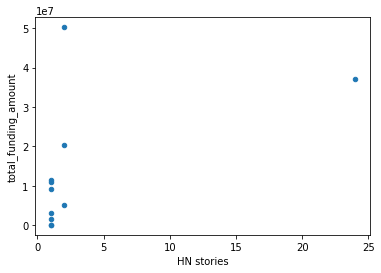

In [57]:
yc_ag_join.plot.scatter(x='HN stories', y='total_funding_amount')

It looks like HN coverage and funding received do not correlate. It's probably because I don't have a lot of data points to work with and the general lack of coverage of agtech startups on HN.